## Feature analysis
## Feature engineering
## Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter

### Load the data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Outlier detection

In [3]:

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indicies
    correspond to the observation containing more than n outliers according 
    to the Tukey method"""
    outlier_indices = []
    # iterate over features
    for col in features:
        Q1 = np.percentile(df[col],25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col]<Q1-outlier_step)|(df[col]>Q3+outlier_step)].index
        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)
        
    # select observaions containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outlier = list(k for k,v in outlier_indices.items() if v > n)
    return multiple_outlier

outliers_to_drop = detect_outliers(train,2,['Age','SibSp','Parch','Fare'])


/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [4]:
outliers_to_drop

[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

2.2we decide to drop these row

In [5]:
train = train.drop(outliers_to_drop,axis=0).reset_index(drop=True)

2.3 join the train and test set twogether to do the data feature enginneering

In [6]:
train_len = len(train)
dataset = pd.concat(objs=[train,test],axis=0).reset_index(drop=True)

In [7]:
dataset.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 12 columns):
Age            1043 non-null float64
Cabin          292 non-null object
Embarked       1297 non-null object
Fare           1298 non-null float64
Name           1299 non-null object
Parch          1299 non-null int64
PassengerId    1299 non-null int64
Pclass         1299 non-null int64
Sex            1299 non-null object
SibSp          1299 non-null int64
Survived       881 non-null float64
Ticket         1299 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 121.9+ KB


2.4 check for null and missing values

In [8]:
# Fill empty and NAN value with NAN
dataset = dataset.fillna(np.nan)

# Check for the null values
dataset.isnull().sum()

Age             256
Cabin          1007
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [9]:
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
PassengerId    881 non-null int64
Survived       881 non-null int64
Pclass         881 non-null int64
Name           881 non-null object
Sex            881 non-null object
Age            711 non-null float64
SibSp          881 non-null int64
Parch          881 non-null int64
Ticket         881 non-null object
Fare           881 non-null float64
Cabin          201 non-null object
Embarked       879 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,881.000000,881.000000,881.000000,711.000000,881.000000,881.000000,881.000000
mean,446.713961,0.385925,2.307605,29.731603,0.455165,0.363224,31.121566
std,256.617021,0.487090,0.835055,14.547835,0.871571,0.791839,47.996249
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,226.000000,0.000000,2.000000,20.250000,0.000000,0.000000,7.895800
50%,448.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


3.Feature analysis

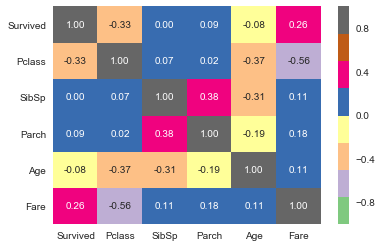

In [13]:
# Correlation matrix between 
g = sns.heatmap(train[['Survived','Pclass','SibSp','Parch','Age','Fare']].corr(),annot=True,fmt='.2f',cmap='Accent')

only Fare features seems to have a signaificate correlation
but we can find the subpopulation in these features

## SibSp
### Explore the SibSp VS Survived

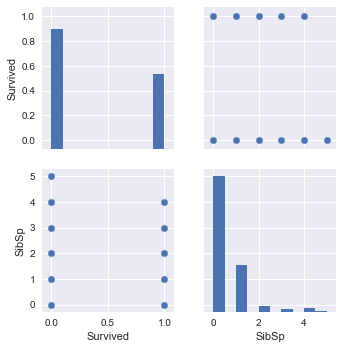

In [14]:
sns.pairplot(train,vars=['Survived','SibSp'])

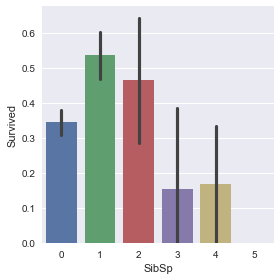

In [15]:
g = sns.factorplot(x='SibSp',y='Survived',data=train,kind='bar')

 It seems that the people has more sibsp has little change to survive. we can consider this in the following feature engineering

### Parch

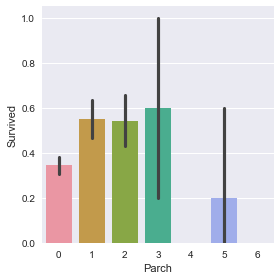

In [16]:
g = sns.factorplot(x='Parch',y='Survived',data=train,kind='bar')

It seem that the small family has more chance to survive than the 0 and middle and big family

### Age

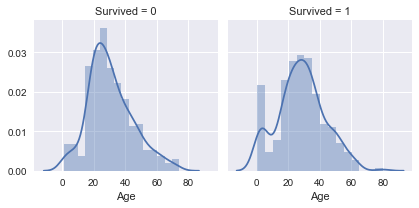

In [17]:
g = sns.FacetGrid(train,col='Survived')
g.map(sns.distplot,'Age')

It seems that there is a category of age people  have more or less chance to survived

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


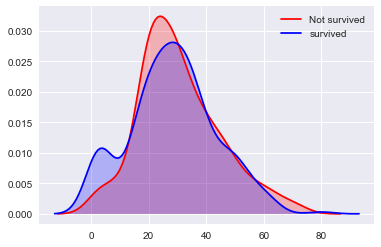

In [18]:
g = sns.kdeplot(train['Age'][(train['Survived'] == 0)&(train['Survived'].notnull())],
               color='red',shade=True)
g = sns.kdeplot(train['Age'][(train['Survived'] == 1)&(train['Survived'].notnull())],
               color='blue',shade=True,ax=g)
g = g.legend(['Not survived','survived'])

Thereis a peak at age 0-10

### Fare

In [19]:
dataset['Fare'].isnull().sum()

1

In [20]:
# Just fill the value with the median value
dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median())

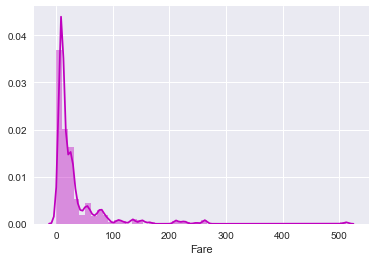

In [21]:
g = sns.distplot(dataset['Fare'],color='m')

Fare distribution is very skewed.This can lead to overweight very
high value in the model,even if it is has been scaled.

In this case, it is better to transform it with the log function to reduce this skew

In [22]:
dataset['Fare'] = dataset['Fare'].map(lambda i:np.log(i) if i >0 else 0)

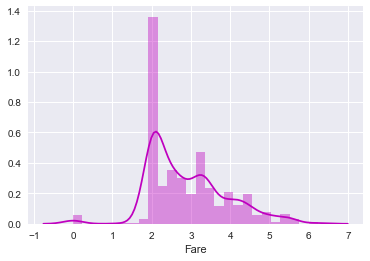

In [23]:
g = sns.distplot(dataset['Fare'],color='m')

## 3.2 Category values

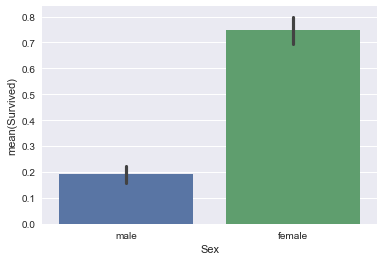

In [24]:
g = sns.barplot(x = 'Sex',y='Survived',data=train)

In [25]:
train[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.747573
male,0.190559


It is clear that man has less chance to survived than female
So sex .may play  a important role in the sur


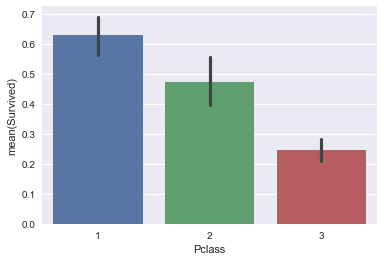

In [26]:
g = sns.barplot(x='Pclass',y='Survived',data=train)

In [27]:
train[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629108
2,0.472826
3,0.245868


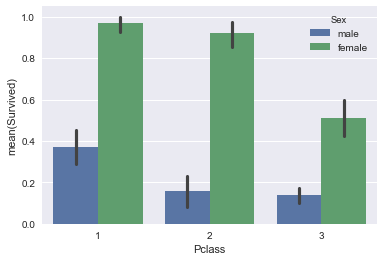

In [28]:
g = sns.barplot(x='Pclass',y='Survived',hue='Sex',data=train)

The people surv is from class1 to class2 to class3


### Embarked

In [29]:
dataset['Embarked'].isnull().sum()

2

In [30]:
# Just fill the nan value with the most frequent value 
dataset['Embarked'] = dataset['Embarked'].fillna('S')

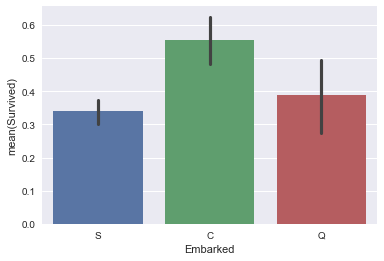

In [31]:
# Explore the Embarked
g = sns.barplot(x='Embarked',y='Survived',data=train)

It is seems that people from C has more chance to survived


Let's see the embarked and pclass distribution
because their distribution has some similarity

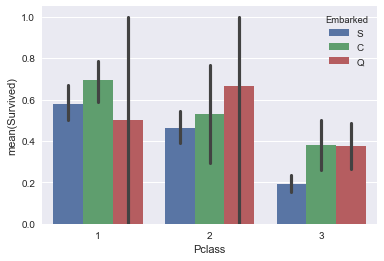

In [32]:
g = sns.barplot(x = 'Pclass',y='Survived',hue='Embarked',data=train)

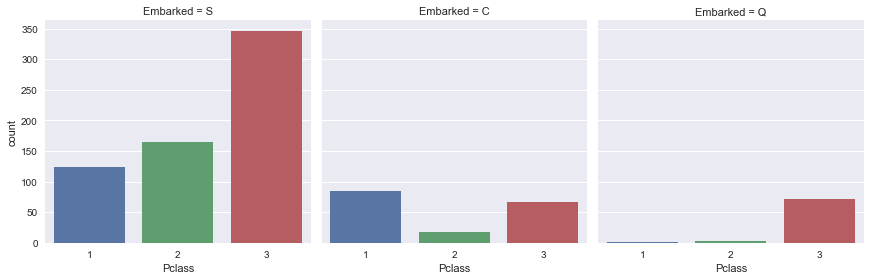

In [33]:
g = sns.factorplot('Pclass',col='Embarked',data=train,kind='count')

the third class is most come from the S and Q,while in C it 
is the class one people

## 4.1Age

the yonger children has more chance to survived
So it is preferable to keep the age feature and imputing the 
missing value.

To address in this problem, We will look at the most correlated features 
with Age(Sex,Parch,Pclass,SibSp)

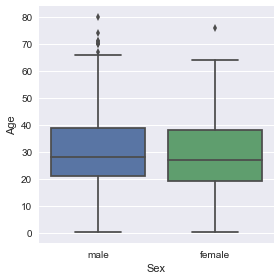

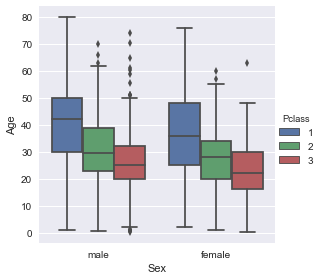

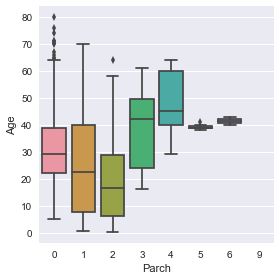

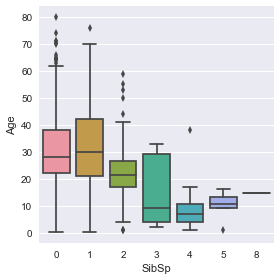

In [34]:
# Explore the Age VS Sex ,Parch, Pclass, SibSp
g = sns.factorplot(y='Age',x='Sex',data=dataset,kind='box')
g = sns.factorplot(y='Age',x='Sex',hue='Pclass',data=dataset,kind='box')
g = sns.factorplot(y='Age',x='Parch',data=dataset,kind='box')
g = sns.factorplot(y='Age',x='SibSp',data=dataset,kind='box')

1.Age distribution seems have nothing with the gender
So exclude the Sex for the Age 
2.Pclas one > Pclass two > Pclass three in the Age
3.More general. the Parch more big ,the Age more old,
4.The SibSp more big the Age more younger

In [35]:
dataset['Sex'] = dataset['Sex'].map({'male':0,'female':1})

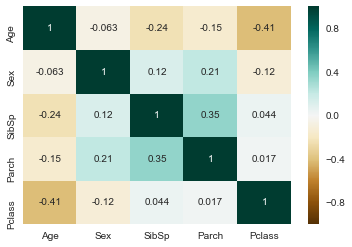

In [36]:
g = sns.heatmap(dataset[['Age','Sex','SibSp','Parch','Pclass']].corr(),
               cmap='BrBG',annot=True)

We decide to use Parch SibSp Pclass to imputing the missing age value

The strategy is fill the Age with the median age of similar rows according to Pclass SibSp Parch


In [37]:
# Filling missing value in age

index_nan_age = list(dataset['Age'][dataset['Age'].isnull()].index)

for i in index_nan_age:
    age_median = dataset['Age'].median()
    age_pred = dataset['Age'][((dataset['SibSp']==dataset.iloc[i]['SibSp'])
                              &(dataset['Parch']==dataset.iloc[i]['Parch'])
                              &(dataset['Pclass'] == dataset.iloc[i]['Pclass']))].median()
    if not np.isnan(age_pred):
        dataset.loc[i,'Age'] = age_pred
    else:
        dataset.loc[i,'Age'] = age_median

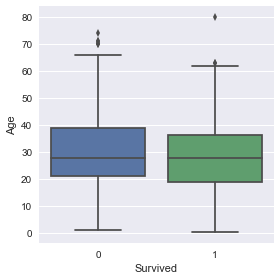

In [38]:
g = sns.factorplot(x='Survived',y='Age',data=train,kind='box')

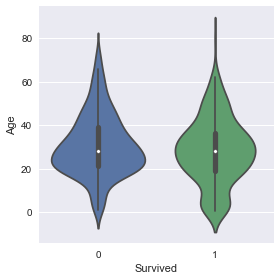

In [39]:
g = sns.factorplot(x='Survived',y='Age',data=train,kind='violin')

## 5.0 Feature Engineering

### 5.1 Name/Title

In [40]:
dataset['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [41]:
# get the title from the name
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in dataset['Name']]
dataset['Title'] = pd.Series(dataset_title)
dataset['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

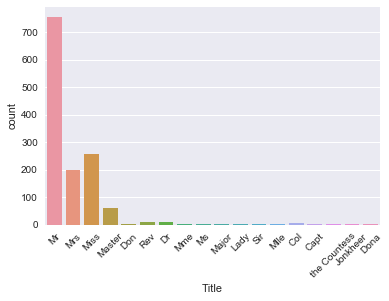

In [42]:
g  = sns.countplot(x='Title',data=dataset)
g = plt.setp(g.get_xticklabels(),rotation=45)

In [43]:
dataset['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [44]:
dataset["Title"] = dataset["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset["Title"] = dataset["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})

In [45]:
dataset['Title'].head()

0    2
1    1
2    1
3    1
4    2
Name: Title, dtype: int64

In [46]:
dataset['Title'].dtype

dtype('int64')

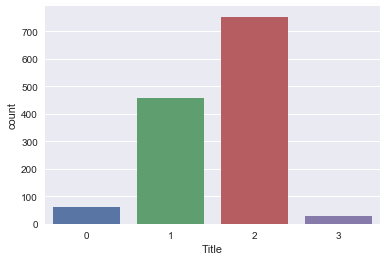

In [47]:
g = sns.countplot(dataset['Title'])

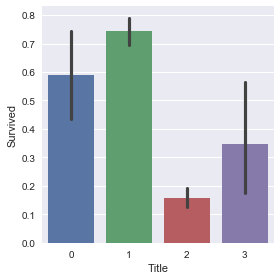

In [48]:
g = sns.factorplot(x='Title',y='Survived',data=dataset,
                  kind='bar')

In [52]:
dataset.drop('Name',axis=1,inplace=True)

## 5.2 Famliy size

In [53]:
# Create  a family size from Parch and SibSp
dataset['Fsize'] = dataset['SibSp'] + dataset['Parch'] + 1

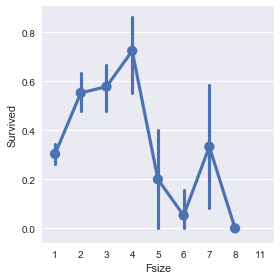

In [55]:
g = sns.factorplot(x='Fsize',y='Survived',data=dataset)

In [56]:
# Create new feature of family size
dataset['Single'] = dataset['Fsize'].map(lambda s: 1 if s == 1 else 0)
dataset['SmallF'] = dataset['Fsize'].map(lambda s: 1 if  s == 2  else 0)
dataset['MedF'] = dataset['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
dataset['LargeF'] = dataset['Fsize'].map(lambda s: 1 if s >= 5 else 0)

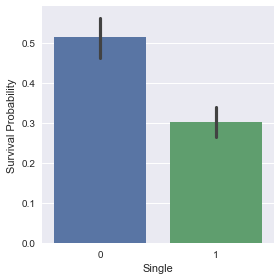

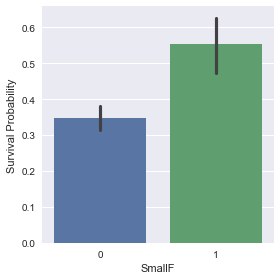

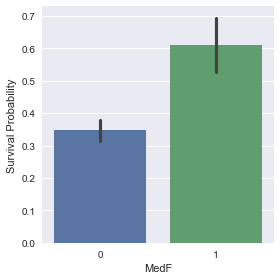

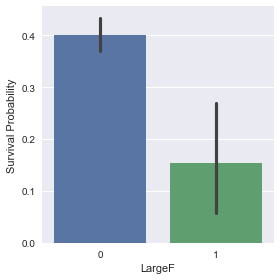

In [57]:
g = sns.factorplot(x="Single",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="SmallF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="MedF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="LargeF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")

In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 17 columns):
Age            1299 non-null float64
Cabin          292 non-null object
Embarked       1299 non-null object
Fare           1299 non-null float64
Parch          1299 non-null int64
PassengerId    1299 non-null int64
Pclass         1299 non-null int64
Sex            1299 non-null int64
SibSp          1299 non-null int64
Survived       881 non-null float64
Ticket         1299 non-null object
Title          1299 non-null int64
Fsize          1299 non-null int64
Single         1299 non-null int64
SmallF         1299 non-null int64
MedF           1299 non-null int64
LargeF         1299 non-null int64
dtypes: float64(3), int64(11), object(3)
memory usage: 172.6+ KB


In [59]:
# Convert to indicator values in Title and Embarked
dataset = pd.get_dummies(dataset,columns=['Title','Embarked'])

In [60]:
dataset.head()

,Age,Cabin,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,...,SmallF,MedF,LargeF,Title_0,Title_1,Title_2,Title_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,NaN,1.981001,0,1,3,0,1,0.0,A/5 21171,...,1,0,0,0,0,1,0,0,0,1
1,38.0,C85,4.266662,0,2,1,1,1,1.0,PC 17599,...,1,0,0,0,1,0,0,1,0,0
2,26.0,NaN,2.070022,0,3,3,1,0,1.0,STON/O2. 3101282,...,0,0,0,0,1,0,0,0,0,1
3,35.0,C123,3.972177,0,4,1,1,1,1.0,113803,...,1,0,0,0,1,0,0,0,0,1
4,35.0,NaN,2.085672,0,5,3,0,0,0.0,373450,...,0,0,0,0,0,1,0,0,0,1


In [61]:
dataset['Cabin'].isnull().sum()

1007

In [62]:
# SO let's explore the cabin and ticket
# this is a option


In [63]:
# Replace the cabin number by the type of cabin'X' if not
dataset['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin']])


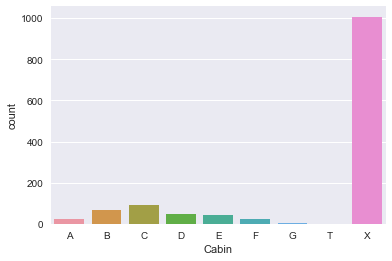

In [64]:
g = sns.countplot(dataset['Cabin'],order=['A','B','C','D','E','F',
                                          'G','T','X'])

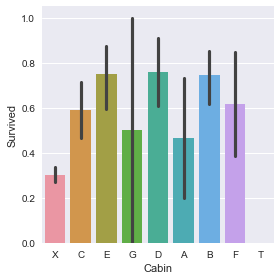

In [65]:
g = sns.factorplot(x='Cabin',y='Survived',data=dataset,kind='bar')

In [66]:
dataset = pd.get_dummies(dataset,columns=['Cabin'],prefix='Cabin')

## 5.4 Ticket

In [67]:
dataset['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [70]:
# Treat Ticket by extracting the ticket  prefiex.
# When there is no prefix it retrun X

Ticket = []
for i in list(dataset['Ticket']):
    if not i.isdigit():
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0])
    else:
        Ticket.append('X')
dataset['Ticket'] = Ticket
dataset['Ticket'].head()

0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket, dtype: object

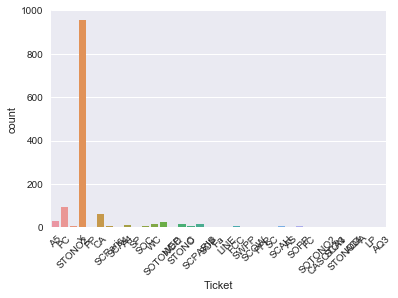

In [72]:
g = sns.countplot(dataset['Ticket'])
g = plt.setp(g.get_xticklabels(),rotation=45)

In [74]:
dataset = pd.get_dummies(dataset,columns=['Ticket'],prefix='T')

### 5.5 create categorical values for Pclas

In [76]:
dataset['Pclass'] = dataset['Pclass'].astype('category')
dataset = pd.get_dummies(dataset,columns=['Pclass'],prefix='Pc')


In [77]:
# Drop uerless variables
dataset.drop(labels=['PassengerId'],axis=1,inplace=True)

In [79]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 67 columns):
Age           1299 non-null float64
Fare          1299 non-null float64
Parch         1299 non-null int64
Sex           1299 non-null int64
SibSp         1299 non-null int64
Survived      881 non-null float64
Fsize         1299 non-null int64
Single        1299 non-null int64
SmallF        1299 non-null int64
MedF          1299 non-null int64
LargeF        1299 non-null int64
Title_0       1299 non-null uint8
Title_1       1299 non-null uint8
Title_2       1299 non-null uint8
Title_3       1299 non-null uint8
Embarked_C    1299 non-null uint8
Embarked_Q    1299 non-null uint8
Embarked_S    1299 non-null uint8
Cabin_A       1299 non-null uint8
Cabin_B       1299 non-null uint8
Cabin_C       1299 non-null uint8
Cabin_D       1299 non-null uint8
Cabin_E       1299 non-null uint8
Cabin_F       1299 non-null uint8
Cabin_G       1299 non-null uint8
Cabin_T       1299 non-null uint8
Cabi

# Modeling

In [80]:
## Separete train and test dataset
train = dataset.iloc[:train_len]
test = dataset.iloc[train_len:]
test.drop(labels=['Survived'],axis=1,inplace=True)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [81]:
## seperate train features and labels
train['Survived'] = train['Survived'].astype(int)
Y_train = train['Survived']
X_train = train.drop(labels=['Survived'],axis=1)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


## 6.1 Simple modeling
### 6.1 Cross validation models
compare 10 popular classifier and evaluate the mean accuracy of each by a stratified kflod cross validation prodedure

In [82]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [84]:
# Cross validation model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)


In [87]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []

for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,X_train,y=Y_train,
                                    scoring='accuracy',cv=kfold,n_jobs=8))

cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    

cv_res = pd.DataFrame({"CrossValMeans":cv_means,
                       "CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron",
        "KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})


/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda/lib/python3.6/site-packages/sklearn/discri

In [88]:
cv_res

,Algorithm,CrossValMeans,CrossValerrors
0,SVC,0.822944,0.045155
1,DecisionTree,0.795774,0.039714
2,AdaBoost,0.804852,0.050309
3,RandomForest,0.814977,0.035252
4,ExtraTrees,0.807035,0.036652
5,GradientBoosting,0.829724,0.041959
6,MultipleLayerPerceptron,0.824068,0.034157
7,KNeighboors,0.795710,0.040837
8,LogisticRegression,0.822932,0.033765
9,LinearDiscriminantAnalysis,0.822932,0.038751


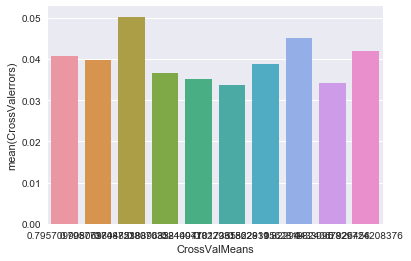

In [90]:
g = sns.barplot('CrossValMeans','CrossValerrors',data=cv_res,
               )

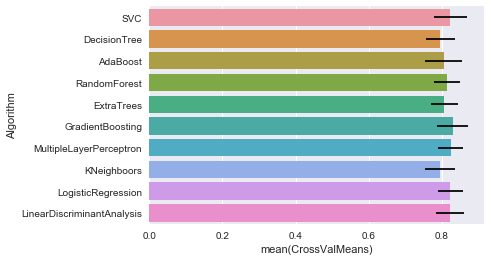

In [91]:
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res,**{'xerr':cv_std})

In [92]:
# So we decide to choose SVC, AdaBoost, 
#RandomForest , ExtraTrees and the GradientBoosting classifiers for the ensemble modeling.

### 6.1.2 Hyperparameters tunning for the best model

Using the grid search for the parameteres search


In [97]:
## Meta modeling with adaboost,RF,Extartrees, and GradientBoosting

# AdaBoosting
DTC = DecisionTreeClassifier()
adaDTC = AdaBoostClassifier(DTC,random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid=ada_param_grid,
                       cv=kfold,scoring='accuracy',n_jobs=8)
gsadaDTC.fit(X_train,Y_train)

ada_best = gsadaDTC.best_estimator_

In [98]:
ada_best

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=0.2, n_estimators=2, random_state=7)

In [99]:
gsadaDTC.best_score_

0.82406356413166859

In [100]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,Y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   13.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   31.9s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   39.6s finished


0.82973893303064694

In [101]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   15.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   36.8s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   45.6s finished


0.83200908059023837

In [102]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   11.0s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   20.7s finished


0.82860385925085134

In [103]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   14.7s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   24.5s finished


0.83314415437003408

### 6.1.3 Plot learning curve

learning curve are good way to see the overfitting effect on the train set and the effect of the training size on the accuracy

In [108]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt    
       

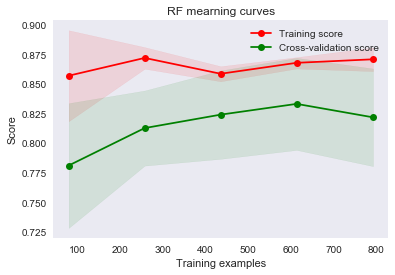

In [109]:
g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,Y_train,cv=kfold)


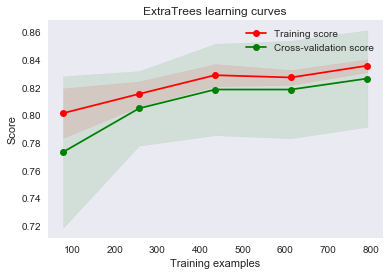

In [110]:
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,Y_train,cv=kfold)

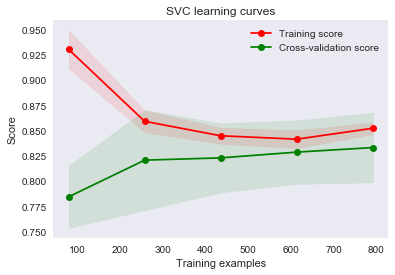

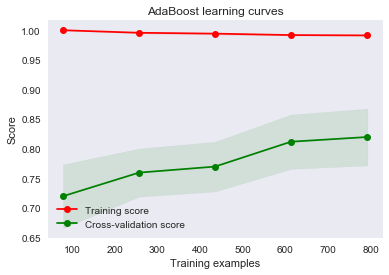

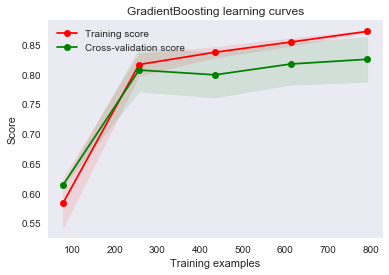

In [111]:
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)

## 6.1.4 feature importance of tree based classifiers

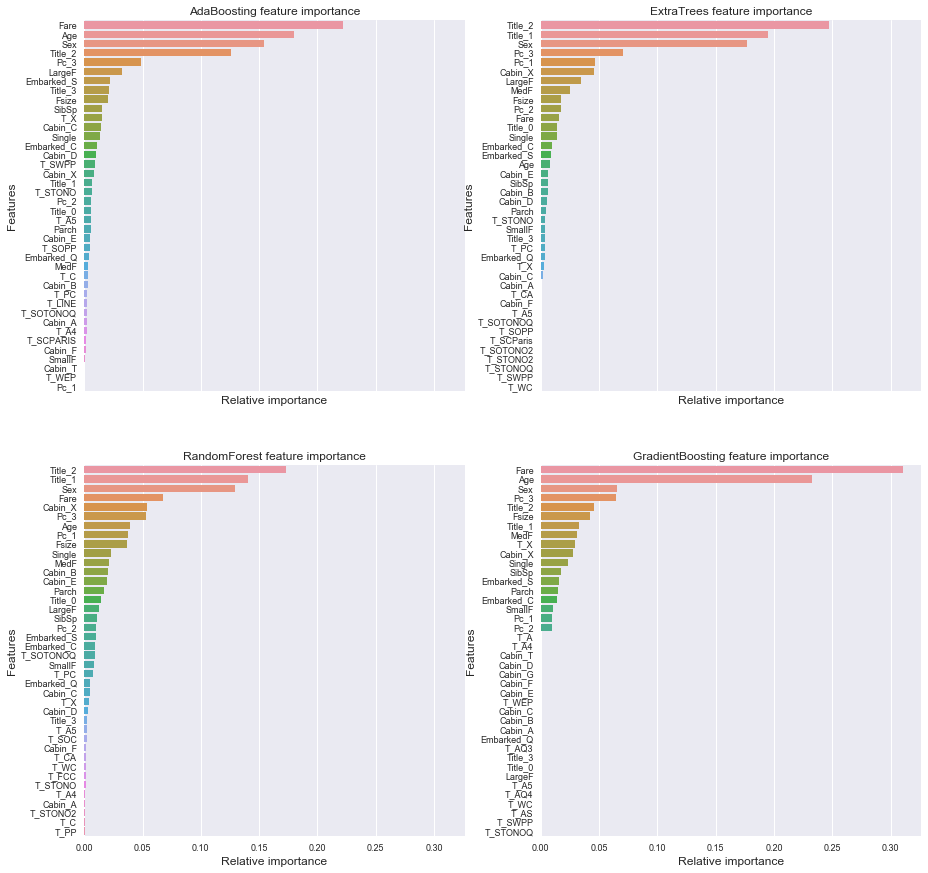

In [114]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows=nrows,ncols=ncols,sharex='all',figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1
        
        

In [115]:
test_Survived_RFC = pd.Series(RFC_best.predict(test), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(test), name="ExtC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(test), name="SVC")
test_Survived_AdaC = pd.Series(ada_best.predict(test), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(test), name="GBC")


# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_AdaC,test_Survived_GBC, test_Survived_SVMC],axis=1)

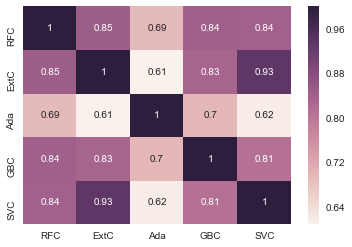

In [117]:
g = sns.heatmap(ensemble_results.corr(),annot=True)

## 6.2 Ensemble medeling

### 6.2.1 combine models

we choose a voting classifier to combine the prediction comming from the 5 classifiers


In [119]:
votingC = VotingClassifier(estimators=[('rfc',RFC_best),('extc',ExtC_best),
                                      ('svc',SVMC_best),('adac',ada_best),
                                      ('gbc',GBC_best)],
                          voting='soft',n_jobs=8)
votingC.fit(X_train,Y_train)
result = votingC.predict(test)


In [121]:
result

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [122]:
result1 = pd.Series(result)

In [123]:
result1.to_csv('tantic_predict0730.csv')